The aim of this notebook is to the analyze the results for the mutual information experiments on CITE-seq analysis with the addition of foundation model embeddings.

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load all of the results 
import os

os.chdir("../data")

MI_hvg_init_10_rep = np.load("MI_estimate_10k_10_times_adt_sct.npy")
MI_random_gauss_20_rep = np.load("MI_simulations_100_gaussian.npy")
MI_hvg_second_10_rep = np.load("MI_estimate_1k_10_times_adt_sct_exp_5.npy")
MI_hvg_esm2_10_rep = np.load("MI_estimate_1k_10_times_adt_sct_exp_5_esm2.npy")
MI_hvg_orthrus_10_rep = np.load("MI_estimate_1k_10_times_adt_sct_exp_5_orthrus.npy")
MI_scgpt_10_rep = np.load("MI_estimate_1k_10_times_adt_sct_exp_5_scgpt.npy")

MI_celltype_specific_hvg = np.load("MI_celltypes_500.npy")
MI_celltypes = np.load("celltype_names.npy")

Text(0.5, 1.0, 'Mutual information between RNA expression and surface protein abundance')

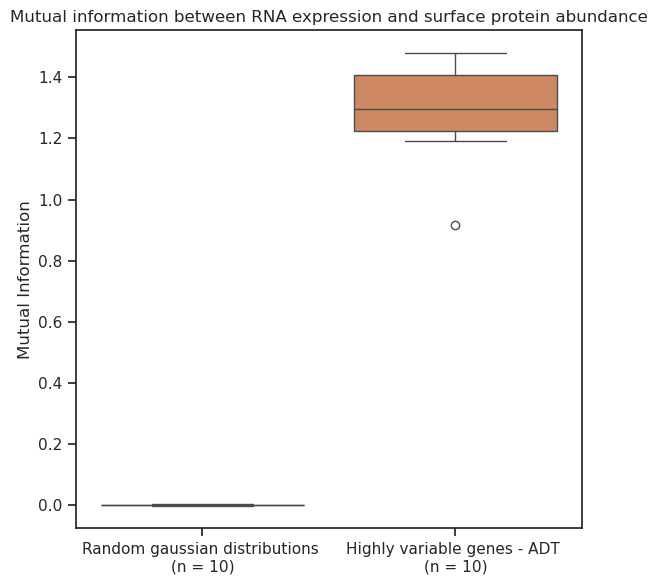

In [ ]:
# Begin by creating a boxplot of hvg init 10 rep and random gauss 20 reps



from matplotlib import rcParams
import seaborn as sns
rcParams.update({'figure.autolayout': True})

# Sample 10 values from MI_random_gauss_20_rep
MI_random_gauss_10_rep_sample = np.random.choice(MI_random_gauss_20_rep, 10)

data = {'Random gaussian distributions \n(n = 10)': MI_random_gauss_10_rep_sample, 'Highly variable genes - ADT \n(n = 10)': MI_hvg_init_10_rep}
df = pd.DataFrame(data)

sns.set_theme(rc={'figure.figsize':(6,6)})
sns.set_style("ticks")
sns.boxplot(data=df)
plt.ylabel("Mutual Information")
plt.title("Mutual information between RNA expression and surface protein abundance")


Text(0.5, 1.0, 'Mutual information between RNA and surface proteins with \nfoundation model embeddings')

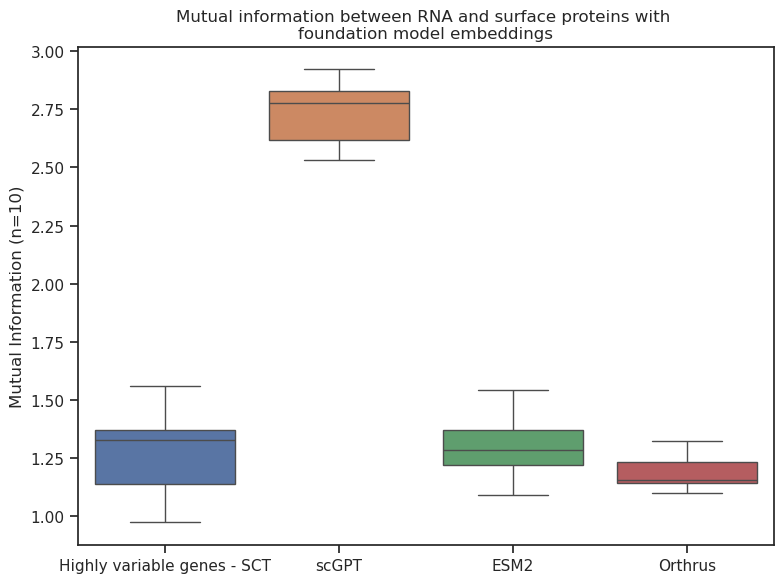

In [ ]:
# Create the same plot for second highly variable genes, scgpt, esm2 and orthrus
MI_fm_comparison = pd.DataFrame({'Highly variable genes': MI_hvg_second_10_rep, 'scGPT': MI_scgpt_10_rep, 'ESM2': MI_hvg_esm2_10_rep, 'Orthrus': MI_hvg_orthrus_10_rep})

sns.set_theme(rc={'figure.figsize':(8,6)})
sns.set_style("ticks")

sns.boxplot(data=MI_fm_comparison)
plt.ylabel("Mutual Information")
plt.title("Mutual information between RNA and surface proteins with \nfoundation model embeddings (10 replicates)")


In [ ]:
# Do the same analysis for the cell-type specific mutual information - but with a barplot 

MI_celltype_specific_hvg_df = pd.DataFrame({'Cell-type specific highly variable genes': MI_celltype_specific_hvg}, index=MI_celltypes)
MI_celltype_specific_hvg_df

# Convert the row into a column
MI_celltype_specific_hvg_df = MI_celltype_specific_hvg_df.reset_index()
MI_celltype_specific_hvg_df

# REmove 'doublet' from the data
MI_celltype_specific_hvg_df = MI_celltype_specific_hvg_df[MI_celltype_specific_hvg_df['index'] != 'Doublet']

Text(0.5, 1.0, 'Cell-type specificity of Mutual Information between RNA and ADT')

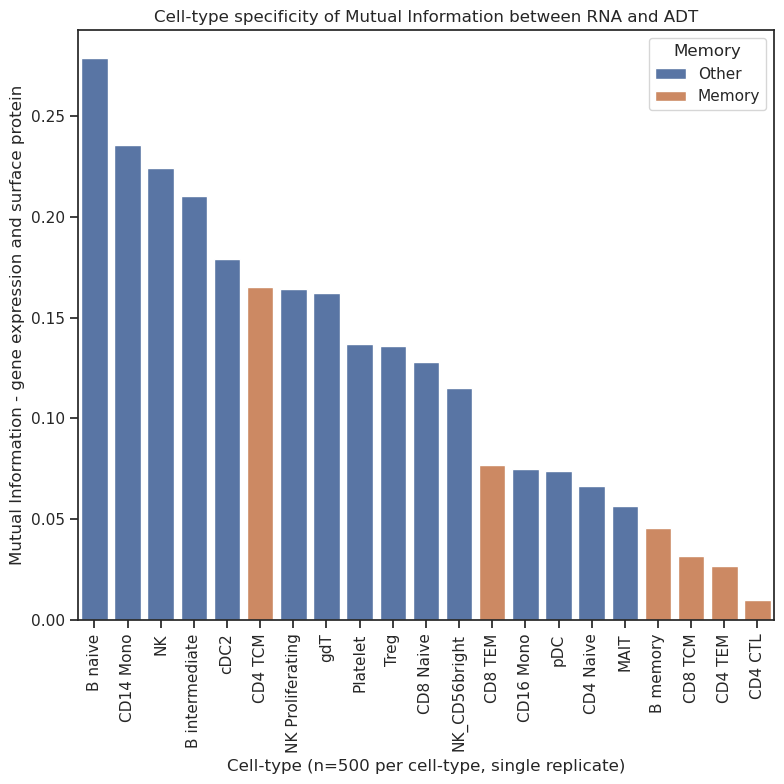

In [ ]:


# Order by the mean mutual information
MI_celltype_specific_hvg_df = MI_celltype_specific_hvg_df.sort_values(by='Cell-type specific highly variable genes', ascending=False)

# For the bottom 4 cell-types, add a label that indicates that they are "Memory" and the rest are "Other"
MI_celltype_specific_hvg_df['Memory'] = MI_celltype_specific_hvg_df['index'].apply(lambda x: 'Memory' if x in ['CD4 TCM', 'CD8 TEM', 'B memory', 'CD8 TCM', 'CD4 TEM', 'CD4 CTL'] else 'Other')


# Create a sns barplot (with a legend) for the cell-type specific mutual information

sns.set_theme(rc={'figure.figsize':(8,8)})
sns.set_style("ticks")
sns.barplot(data=MI_celltype_specific_hvg_df, x = "index", y = 'Cell-type specific highly variable genes', hue = "Memory")

# Rotate the plot
plt.xticks(rotation=90)
plt.ylabel("Mutual Information - gene expression and surface protein")
plt.xlabel("Cell-type (n=500 per cell-type, single replicate)")
plt.title("Cell-type specificity of Mutual Information between RNA and ADT")